
#Giorgio Mendoza
#CS539-F23-F02
#Dr. Sethi
#Final Project

#Abstract:

This document presents a comprehensive analysis conducted to explore the research question: "Is there a statistically significant correlation between the production of plastic waste and key socio-economic factors such as GDP and population density across various countries?" Utilizing datasets from credible sources, we applied standard machine learning techniques such as correlation analysis, principal component analysis (PCA), and hierarchical clustering. The findings reveal a moderate correlation between GDP and plastic waste production, and clusters of countries with similar socio-economic profiles were identified. The results of PCA suggest that GDP is a more significant predictor of plastic waste production than population size. This analysis provides insights that could inform policy-making and strategic planning for waste management and economic development on a global scale.

#Overview and Motivation:

This project investigates the link between plastic waste production and socio-economic indicators like GDP and population density, motivated by the urgent need to address global plastic pollution. By identifying the drivers of plastic waste, the study aims to inform sustainable waste management strategies. The focus on these particular factors arises from the hypothesis that a country's economic activities and population patterns significantly influence its environmental impact, specifically in terms of plastic waste generation. Through this research, I aim to provide realistic insights that could help mitigate one of the most challenging environmental issues of this century.

#Related Work:

My research was inspired by the 2021 paper "Forecasting plastic waste generation and interventions for environmental hazard mitigation." This recent work provides valuable insights into the urgent global issue of plastic waste management, with a focus on European Union countries. It employs advanced machine learning techniques such as Artificial Neural Networks, Cross Validation, SHAP Analysis, and Scenario Analysis to predict and mitigate environmental hazards associated with plastic waste. However, both this paper and my research employ Clustering Analysis. My project diverges since it includes population, but the paper includes energy recovery and landfill.



#Initial Questions:

My research began with the question: "Do socio-economic factors like GDP and population density significantly correlate with plastic waste production across countries?" This focus expanded to examine the role of recycling methods in mitigating plastic waste. As the project evolved, I also explored how different waste management strategies and economic development levels impact plastic waste generation, leading to a broader and more nuanced understanding of these complex relationships.

#Data:

The four datasets that I've used are listed below:

- Generation of plastic packaging waste per capita
https://ec.europa.eu/eurostat/web/products-datasets/-/cei_pc050
- GDP per capita
https://ourworldindata.org/grapher/gdp-per-capita-maddison
- Population, total - European Union
https://data.worldbank.org/indicator/SP.POP.TOTL?end=2022&locations=EU&start=2000&view=chart
- Recycling rates for packaging waste https://ec.europa.eu/eurostat/web/products-datasets/-/ten00063

In this study, I utilized datasets from Eurostat and the World Bank, focusing on metrics like plastic packaging waste per capita, GDP per capita, total population, and packaging waste recycling rates within the European Union. The years were standardized across datasets (e.g., GDP_2000, Plastic_Waste_2000, etc.). Challenges included handling missing values for countries that joined the EU in different years, which I addressed using the KNN method for data imputation. This approach helped maintain data consistency and accuracy for the analysis. I also learned that CSV were easier to work with compared to XLS files since they had less atributes to filter.

#Exploratory Data Analysis:

Some of the EDA techniques used are bar charts, PCA and hierarchical clustering.The bar charts were employed to provide a clear visual comparison of GDP and plastic waste statistics across various countries, highlighting the mean, minimum, and maximum values to establish a baseline understanding of the data spread.

Then, PCA was used to reduce the dimensionality of the socio-economic factors and plastic waste data, resulting in a scatter plot that identifies natural groupings within the data while retaining the most variance.

This analysis was complemented by hierarchical clustering, which revealed the relative proximity of countries based on their socio-economic and environmental profiles, presented in a dendrogram that illustrates the hierarchical nature of these groupings.

Together, these visualizations synthesize complex multi-dimensional data into interpretable formats, allowing for the identification of patterns and relationships that can inform subsequent analysis and decision-making.

#Model Revision:

I reduced the project's scope to focus on the EU due to better data organization compared to other regions (i.e. Asia, America, Africa, etc). I also encountered incomplete data within the EU, especially regarding recycling rates, so I adapted my approach to ensure a manageable analysis. The final model, based on clustering analysis, provided initial insights into the relationship between plastic waste production and socio-economic factors, confirming the value of concentrating on European data.




#Full Analysis:

The data revealed a moderate positive correlation between GDP and plastic waste production, indicating that wealthier countries tend to generate more plastic waste. Population showed a weaker positive correlation with both GDP and plastic waste, suggesting that while larger countries have higher GDP and waste production, the relationship isn't as strong. These findings were initially validated by the correlation matrix.

Cluster analysis further enriched the understanding by grouping countries with similar socio-economic and plastic waste profiles. The PCA scatter plot, colored by cluster, showed natural groupings and outliers, suggesting that while some countries follow general trends, others deviate based on unique national characteristics.

The hierarchical clustering dendrogram complemented these findings by illustrating the multi-level similarity between countries, providing a visual hierarchy of the relationships within the data.

The initial metrics validated the hypotheses and provided a foundation for further exploration. Future work might include applying other machine learning algorithms, such as regression analysis, to quantify the impact of these factors on plastic waste production and explore causality.

I recently included a dataset which includes data related to the recycling rates of these countries, however, I haven't used it in the research yet since the years span over 2011 to 2021. So I need to alter some of the code for consistency.

Perhaps this additional data can explain the outliers and the weak correlation in the early analysis. Further machine learning techniques like regression could also be applied to investigate causality and impact.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gdp-per-capita-maddison.csv')

# Define list of EU member states by their ISO country codes
eu_countries = [
    'BEL', 'BGR', 'CZE', 'DNK', 'DEU', 'EST', 'IRL', 'GRC', 'ESP', 'FRA',
    'HRV', 'ITA', 'CYP', 'LVA', 'LTU', 'LUX', 'HUN', 'MLT', 'NLD', 'AUT',
    'POL', 'PRT', 'ROU', 'SVN', 'SVK', 'FIN', 'SWE'
]

# Filter dataset for years 2000 to 2018
df_2000_2018 = df[(df['Year'] >= 2000) & (df['Year'] <= 2018) & (df['Code'].isin(eu_countries))]

# Pivot table to have countries as rows and years as columns
pivot_table = df_2000_2018.pivot(index='Code', columns='Year', values='GDP per capita')

# Sort table by last year to see progression
pivot_table_sorted = pivot_table.sort_values(by=2018, ascending=False)

print(pivot_table_sorted)



Year        2000        2001       2002       2003       2004       2005  \
Code                                                                       
IRL   38806.5000  40966.3320  43012.816  44372.758  47028.863  49223.383   
LUX   50063.8240  50527.6640  51709.734  51717.030  52624.164  53262.094   
NLD   37899.9500  38636.2230  38653.125  38803.957  39682.375  40679.490   
DNK   39021.1760  39425.8630  39709.370  39983.145  41178.562  42264.630   
DEU   33367.2850  34260.2900  34590.930  34716.440  35528.715  36205.574   
SWE   34202.6050  34666.6640  35569.773  36435.754  38016.062  39258.992   
AUT   34796.2580  35272.2230  35823.586  36063.120  36957.113  37642.760   
BEL   33719.7700  33923.3440  34419.695  34588.477  35740.350  36338.383   
FIN   32689.7700  33481.6800  33986.555  34607.220  35888.613  36787.258   
FRA   33409.6800  33920.0980  34152.773  34292.030  35093.824  35495.465   
ITA   32716.9800  33511.4340  33780.055  33917.800  34472.130  34872.125   
MLT   20434.

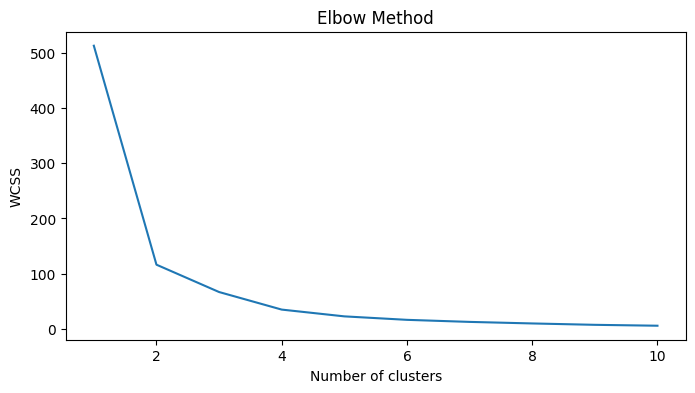

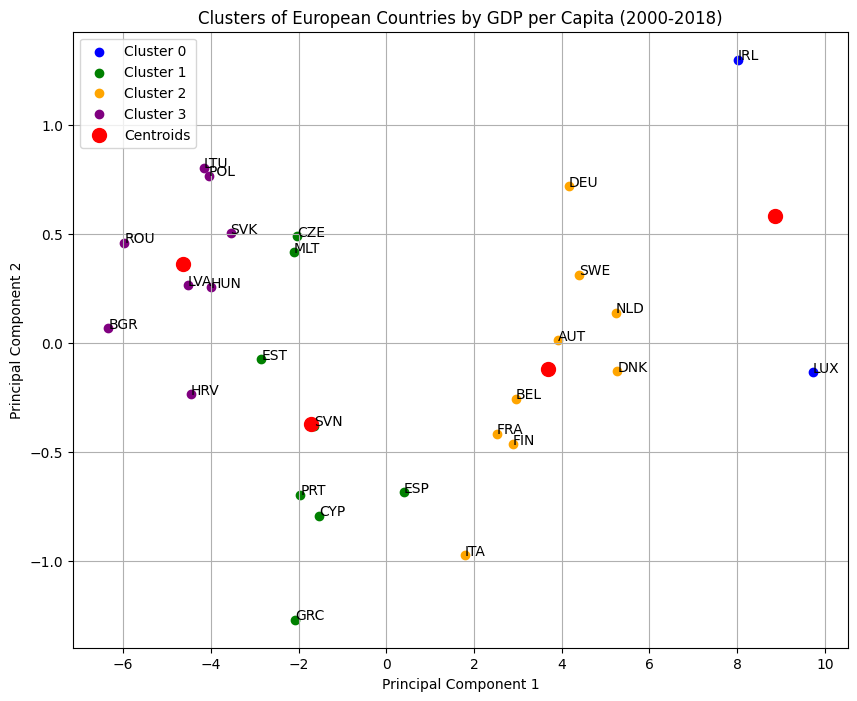

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gdp-per-capita-maddison.csv')

# Define list of EU member states by their ISO country codes
eu_countries = [
    'BEL', 'BGR', 'CZE', 'DNK', 'DEU', 'EST', 'IRL', 'GRC', 'ESP', 'FRA',
    'HRV', 'ITA', 'CYP', 'LVA', 'LTU', 'LUX', 'HUN', 'MLT', 'NLD', 'AUT',
    'POL', 'PRT', 'ROU', 'SVN', 'SVK', 'FIN', 'SWE'
]

# Filter dataset for years 2000 to 2018
df_2000_2018 = df[(df['Year'] >= 2000) & (df['Year'] <= 2018) & (df['Code'].isin(eu_countries))]

# Pivot table to have countries as rows and years as columns
pivot_table = df_2000_2018.pivot(index='Code', columns='Year', values='GDP per capita')

# Sort table by last year to see the progression
pivot_table_sorted = pivot_table.sort_values(by=2018, ascending=False)

# Drop any missing values if present (countries with missing data)
pivot_table_cleaned = pivot_table_sorted.dropna()

# Standardize data (important for k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pivot_table_cleaned)

# Elbow Method to determine k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for Within-Cluster Sum of Square
plt.show()

# Based on Elbow graph, choose number of clusters (k)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit KMeans using standardized data
clusters = kmeans.fit_predict(data_scaled)

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add cluster labels to PCA DataFrame
pca_df['Cluster'] = clusters

# Add country codes to PCA DataFrame for labeling
pca_df['Country'] = pivot_table_cleaned.index

# Get centroids
centroids = kmeans.cluster_centers_

# Transform centroids using PCA model
centroids_pca = pca.transform(centroids)

# Plot clusters
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'purple']
for i in range(k):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PC1'], pca_df[pca_df['Cluster'] == i]['PC2'], label=f'Cluster {i}', c=colors[i])

# Plotting centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', label='Centroids')

plt.title('Clusters of European Countries by GDP per Capita (2000-2018)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Annotate country codes
for i, txt in enumerate(pca_df['Country']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gener of plastic packaging waste per capita.csv', skiprows=8)

# only need first 20 columns, ignore rest
df = df.iloc[:, :20]  # discard empty columns

# Rename columns assuming first column is 'GEO (Labels)' and rest are years from 2000 to 2018
df.columns = ['Code'] + list(range(2000, 2019))

# Convert all entries in 'GEO (Labels)' to uppercase to match country codes in eu_countries list
df['Code'] = df['Code'].str.upper()

eu_countries = [
    'BEL', 'BGR', 'CZE', 'DNK', 'DEU', 'EST', 'IRL', 'GRC', 'ESP', 'FRA',
    'HRV', 'ITA', 'CYP', 'LVA', 'LTU', 'LUX', 'HUN', 'MLT', 'NLD', 'AUT',
    'POL', 'PRT', 'ROU', 'SVN', 'SVK', 'FIN', 'SWE'
]

# Filter dataframe to include only rows where 'GEO (Labels)' is in eu_countries list
eu_data = df[df['Code'].isin(eu_countries)]

# Replace non-numeric values with NaN and convert all columns to numeric, coercing errors to NaN
for column in eu_data.columns[1:]:  # Skipping 'GEO (Labels)' column
    eu_data.loc[:, column] = pd.to_numeric(eu_data[column], errors='coerce')


#limit data to years 2000 to 2018
eu_data = eu_data[['Code'] + list(range(2000, 2019))]

#display cleaned EU data for years 2000-2018
print(eu_data)


   Code   2000   2001   2002   2003   2004   2005   2006   2007   2008   2009  \
0   IRL  44.84  44.89  45.09  56.13  51.99  52.41  61.75  54.03  55.25  49.47   
1   LUX  21.87  21.89  21.81  39.50  48.19  47.93  46.88  52.58  44.47  41.56   
2   EST    NaN    NaN    NaN    NaN  21.26  23.29  26.85  27.85  53.72  39.42   
4   DEU  21.78  22.95  25.13  25.09  27.33  28.71  31.46  32.14  33.28  32.00   
5   PRT  27.79  29.28  31.19  31.55  32.86  33.86  35.86  35.89  36.74  35.77   
7   ITA  33.37  34.23  34.19  34.90  35.61  36.21  37.87  38.84  37.48  35.40   
9   DNK  29.44  28.02  29.25  28.71  32.25  33.73  35.09  35.12  30.01  29.96   
10  AUT  26.21  25.43  24.75  26.69  27.55  27.35  28.80  29.49  30.23  30.66   
11  FRA  29.29  29.21  30.29  31.43  31.66  31.86  32.53  33.12  31.89  29.10   
12  ESP  29.41  32.24  31.84  33.36  34.09  35.86  36.38  37.12  34.49  31.12   
14  HUN    NaN    NaN    NaN    NaN  16.33  18.62  19.71  21.73  21.44  22.89   
15  BEL  23.78  23.32  24.97

<ipython-input-75-d8d5ec59d987>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data.loc[:, column] = pd.to_numeric(eu_data[column], errors='coerce')
<ipython-input-75-d8d5ec59d987>:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eu_data.loc[:, column] = pd.to_numeric(eu_data[column], errors='coerce')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

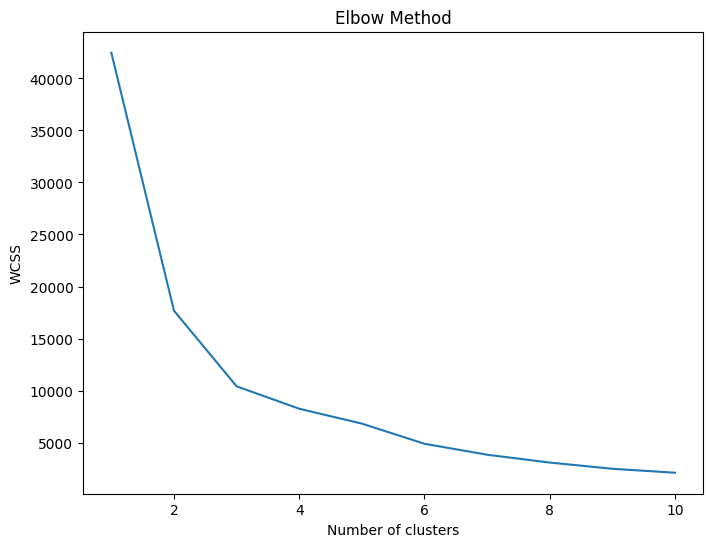

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


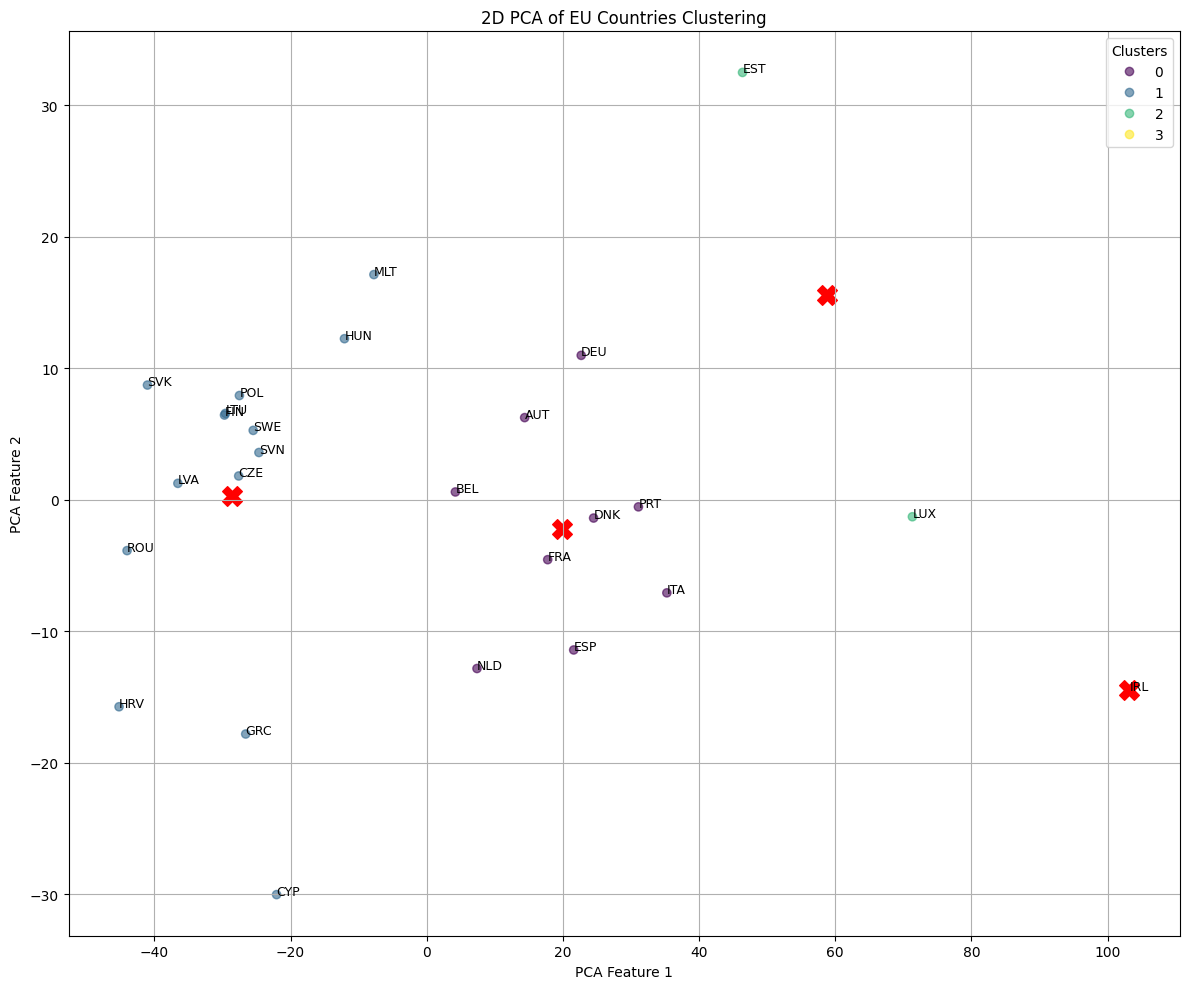

   Code    2000    2001    2002    2003    2004    2005    2006    2007  \
0   IRL  44.840  44.890  45.090  56.130  51.990  52.410  61.750  54.030   
1   LUX  21.870  21.890  21.810  39.500  48.190  47.930  46.880  52.580   
2   EST  27.718  27.982  28.902  29.388  21.260  23.290  26.850  27.850   
4   DEU  21.780  22.950  25.130  25.090  27.330  28.710  31.460  32.140   
5   PRT  27.790  29.280  31.190  31.550  32.860  33.860  35.860  35.890   
7   ITA  33.370  34.230  34.190  34.900  35.610  36.210  37.870  38.840   
9   DNK  29.440  28.020  29.250  28.710  32.250  33.730  35.090  35.120   
10  AUT  26.210  25.430  24.750  26.690  27.550  27.350  28.800  29.490   
11  FRA  29.290  29.210  30.290  31.430  31.660  31.860  32.530  33.120   
12  ESP  29.410  32.240  31.840  33.360  34.090  35.860  36.380  37.120   
14  HUN  22.472  22.764  23.606  22.504  16.330  18.620  19.710  21.730   
15  BEL  23.780  23.320  24.970  26.800  27.010  27.700  28.660  29.060   
16  NLD  28.760  30.290  

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Convert year columns to integers if they are not already
year_columns = list(range(2000, 2019))

#apply KNN imputer to these columns
imputer = KNNImputer(n_neighbors=5)
eu_data[year_columns] = imputer.fit_transform(eu_data[year_columns])

# Use Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):  # Test 1 to 10 clusters or adjust range as needed
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(eu_data[year_columns])
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# select optimal number of clusters based on plot
optimal_clusters = 4

# Fit KMeans model with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
eu_data['cluster'] = kmeans.fit_predict(eu_data[year_columns])

# Perform PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(eu_data[year_columns])

# Get cluster assignments and country codes
clusters = eu_data['cluster'].values
country_codes = eu_data['Code'].values  # Assuming 'GEO (Labels)' is column with country codes

# Scatter plot of reduced data with cluster assignments
plt.figure(figsize=(12, 10))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)

# Annotate each data point with country code
for i, txt in enumerate(country_codes):
    plt.annotate(txt, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=9)

# Plotting centroids (transformed with PCA)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# Adding labels and title
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('2D PCA of EU Countries Clustering')

# Adding legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.grid(True)
plt.tight_layout()

plt.show()

# Print DataFrame with imputed values and cluster assignments
print(eu_data[['Code'] + year_columns + ['cluster']])


In [ ]:
# Reset index to make sure 'Code' is a column in eu_data
eu_data.reset_index(drop=True, inplace=True)

# merge pivot_table_sorted and eu_data on 'Code' column
merged_data = pd.merge(pivot_table_sorted, eu_data, on='Code')
# Remove 'cluster' column from dataframe
merged_data.drop('cluster', axis=1, inplace=True)

#rename columns for clarity
column_mapping = {
    '2000_x': 'GDP_2000', '2001_x': 'GDP_2001', '2002_x': 'GDP_2002', '2003_x': 'GDP_2003',
    '2004_x': 'GDP_2004', '2005_x': 'GDP_2005', '2006_x': 'GDP_2006', '2007_x': 'GDP_2007',
    '2008_x': 'GDP_2008', '2009_x': 'GDP_2009', '2010_x': 'GDP_2010', '2011_x': 'GDP_2011',
    '2012_x': 'GDP_2012', '2013_x': 'GDP_2013', '2014_x': 'GDP_2014', '2015_x': 'GDP_2015',
    '2016_x': 'GDP_2016', '2017_x': 'GDP_2017', '2018_x': 'GDP_2018',
    '2000_y': 'Plastic_Waste_2000', '2001_y': 'Plastic_Waste_2001', '2002_y': 'Plastic_Waste_2002',
    '2003_y': 'Plastic_Waste_2003', '2004_y': 'Plastic_Waste_2004', '2005_y': 'Plastic_Waste_2005',
    '2006_y': 'Plastic_Waste_2006', '2007_y': 'Plastic_Waste_2007', '2008_y': 'Plastic_Waste_2008',
    '2009_y': 'Plastic_Waste_2009', '2010_y': 'Plastic_Waste_2010', '2011_y': 'Plastic_Waste_2011',
    '2012_y': 'Plastic_Waste_2012', '2013_y': 'Plastic_Waste_2013', '2014_y': 'Plastic_Waste_2014',
    '2015_y': 'Plastic_Waste_2015', '2016_y': 'Plastic_Waste_2016', '2017_y': 'Plastic_Waste_2017',
    '2018_y': 'Plastic_Waste_2018'
}

merged_data.rename(columns=column_mapping, inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(merged_data)
merged_data.to_csv('/content/drive/MyDrive/Colab Notebooks/merged_data.csv', index=False)



   Code    GDP_2000    GDP_2001   GDP_2002   GDP_2003   GDP_2004   GDP_2005  \
0   IRL  38806.5000  40966.3320  43012.816  44372.758  47028.863  49223.383   
1   LUX  50063.8240  50527.6640  51709.734  51717.030  52624.164  53262.094   
2   NLD  37899.9500  38636.2230  38653.125  38803.957  39682.375  40679.490   
3   DNK  39021.1760  39425.8630  39709.370  39983.145  41178.562  42264.630   
4   DEU  33367.2850  34260.2900  34590.930  34716.440  35528.715  36205.574   
5   SWE  34202.6050  34666.6640  35569.773  36435.754  38016.062  39258.992   
6   AUT  34796.2580  35272.2230  35823.586  36063.120  36957.113  37642.760   
7   BEL  33719.7700  33923.3440  34419.695  34588.477  35740.350  36338.383   
8   FIN  32689.7700  33481.6800  33986.555  34607.220  35888.613  36787.258   
9   FRA  33409.6800  33920.0980  34152.773  34292.030  35093.824  35495.465   
10  ITA  32716.9800  33511.4340  33780.055  33917.800  34472.130  34872.125   
11  MLT  20434.5490  20413.0500  20873.984  21273.13

In [ ]:
# Filter DataFrame to get two separate DataFrames for GDP and Plastic Waste
gdp_columns = [col for col in merged_data.columns if 'GDP' in col]
plastic_waste_columns = [col for col in merged_data.columns if 'Plastic_Waste' in col]

# Get DataFrame for GDP and Plastic Waste
gdp_data = merged_data[['Code'] + gdp_columns]
plastic_waste_data = merged_data[['Code'] + plastic_waste_columns]

#calculate summary statistics for GDP for each country
gdp_stats = gdp_data.set_index('Code').stack().groupby('Code').agg(['mean', 'min', 'max'])

#calculate summary statistics for Plastic Waste for each country
plastic_waste_stats = plastic_waste_data.set_index('Code').stack().groupby('Code').agg(['mean', 'min', 'max'])


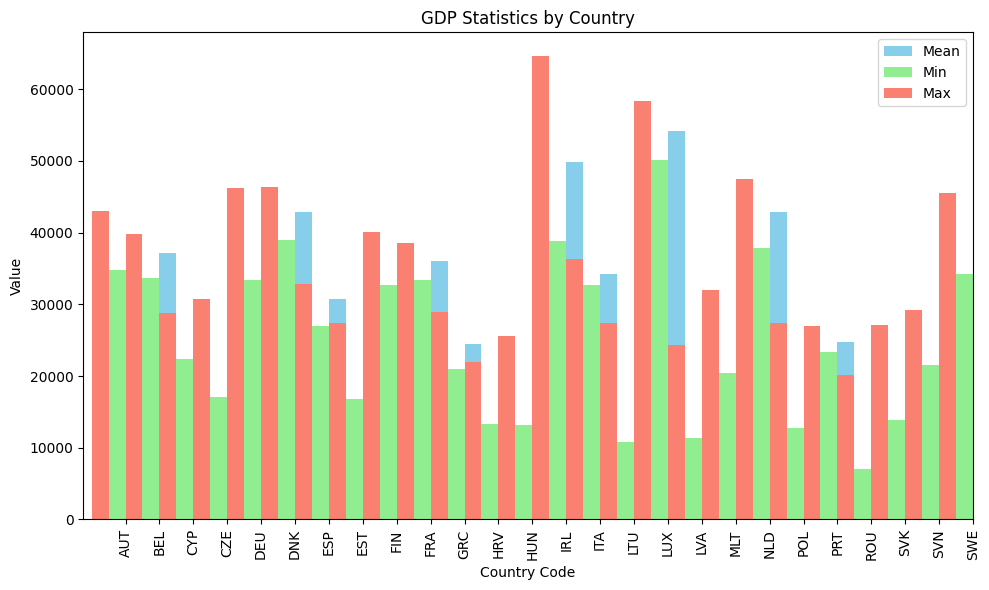

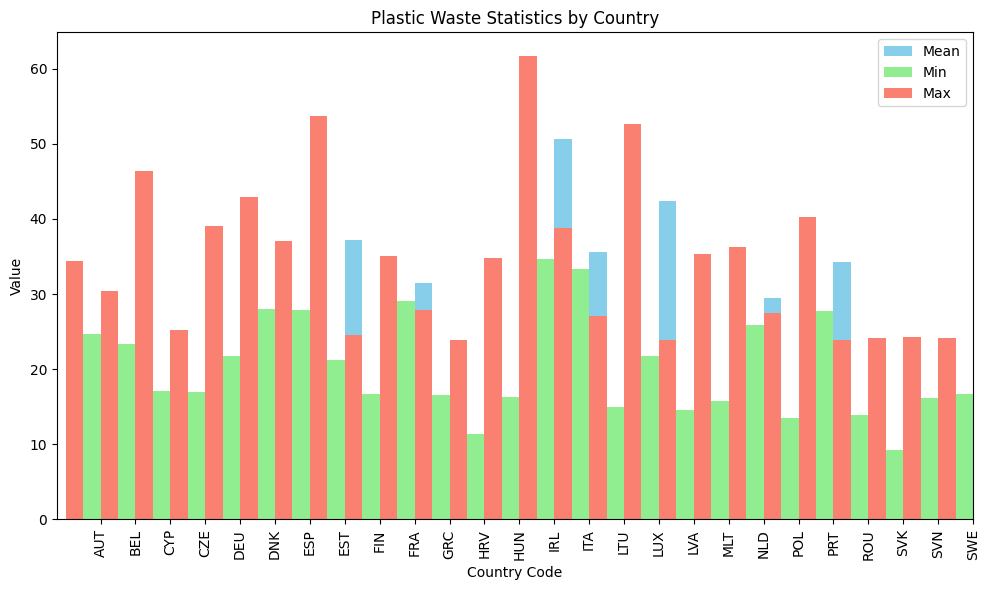

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame to get two separate DataFrames for GDP and Plastic Waste
gdp_columns = [col for col in merged_data.columns if 'GDP' in col]
plastic_waste_columns = [col for col in merged_data.columns if 'Plastic_Waste' in col]

# Get the DataFrame for GDP and Plastic Waste
gdp_data = merged_data[['Code'] + gdp_columns]
plastic_waste_data = merged_data[['Code'] + plastic_waste_columns]

#calculate summary statistics for GDP for each country
gdp_stats = gdp_data.set_index('Code').stack().groupby('Code').agg(['mean', 'min', 'max'])

#calculate summary statistics for Plastic Waste for each country
plastic_waste_stats = plastic_waste_data.set_index('Code').stack().groupby('Code').agg(['mean', 'min', 'max'])

# Function to create a bar chart for statistics
def plot_stats(df, title):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot mean, min, and max
    df['mean'].plot(kind='bar', ax=ax, color='skyblue', position=0, label='Mean')
    df['min'].plot(kind='bar', ax=ax, color='lightgreen', position=1, label='Min')
    df['max'].plot(kind='bar', ax=ax, color='salmon', position=2, label='Max')

    # Set title and labels
    ax.set_title(title)
    ax.set_ylabel('Value')
    ax.set_xlabel('Country Code')
    ax.legend()

    # Show plot
    plt.xticks(rotation=90)  # Rotate x-axis labels to show them better
    plt.tight_layout()
    plt.show()

# Plot GDP stats
plot_stats(gdp_stats, "GDP Statistics by Country")

# Plot Plastic Waste stats
plot_stats(plastic_waste_stats, "Plastic Waste Statistics by Country")


In [ ]:
import pandas as pd

# Calculate average of GDP and Plastic Waste over years for each country
merged_data['avg_GDP'] = merged_data[gdp_columns].mean(axis=1)
merged_data['avg_Plastic_Waste'] = merged_data[plastic_waste_columns].mean(axis=1)

#use .corr() method to find Pearson correlation coefficient
correlation_matrix = merged_data[['avg_GDP', 'avg_Plastic_Waste']].corr()

# Show correlation matrix
print(correlation_matrix)


                    avg_GDP  avg_Plastic_Waste
avg_GDP            1.000000           0.700062
avg_Plastic_Waste  0.700062           1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


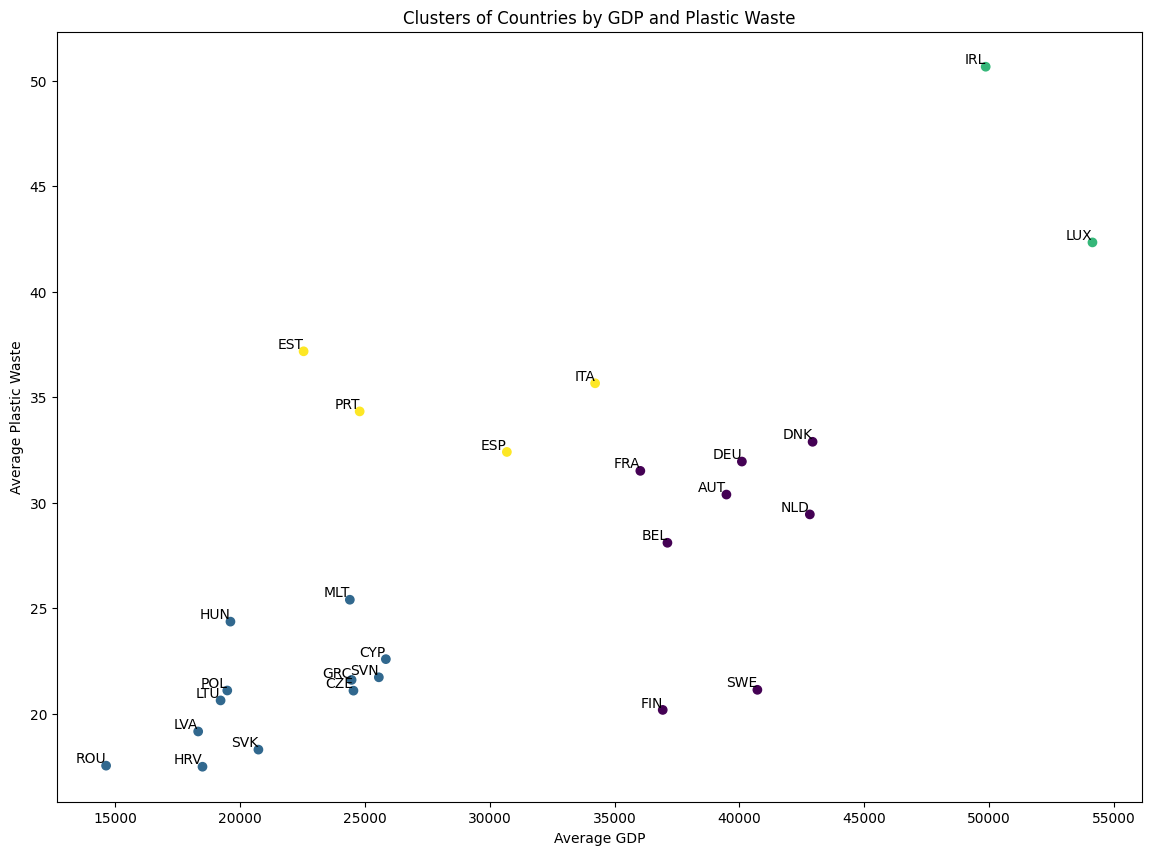

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Filter DataFrame to only include GDP and Plastic Waste columns
features = merged_data[['avg_GDP', 'avg_Plastic_Waste']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose number of clusters (k) and fit KMeans model
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features_scaled)

# Add cluster information back to original DataFrame
merged_data['cluster'] = kmeans.labels_

plt.figure(figsize=(14, 10))
plt.scatter(merged_data['avg_GDP'], merged_data['avg_Plastic_Waste'], c=merged_data['cluster'], cmap='viridis')

# Annotate each point in the scatter plot with country code
for i, row in merged_data.iterrows():
    plt.text(row['avg_GDP'], row['avg_Plastic_Waste'], row['Code'], color='black', ha='right', va='bottom')

plt.title('Clusters of Countries by GDP and Plastic Waste')
plt.xlabel('Average GDP')
plt.ylabel('Average Plastic Waste')
plt.show()


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/globalpop.xls'

global_df = pd.read_excel(file_path, header=3)
eu_df = global_df[global_df['Country Code'].isin(eu_countries)]
years = [str(year) for year in range(2000, 2019)]  # Years from 2000 to 2018
columns_to_keep = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years
eu_df_years = eu_df[columns_to_keep]

years = range(2000, 2019)
for year in years:
    eu_df_years.rename(columns={str(year): f'Population_{year}'}, inplace=True)


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/merged_data.csv'
merged_data = pd.read_csv(file_path)

combined_df = pd.merge(eu_df_years, merged_data, how='inner', left_on='Country Code', right_on='Code')
output_file_path = '/content/drive/MyDrive/Colab Notebooks/combined_data.csv'
combined_df.to_csv(output_file_path, index=False)
print(combined_df.head(20))

   Country Name Country Code     Indicator Name Indicator Code  \
0       Austria          AUT  Population, total    SP.POP.TOTL   
1       Belgium          BEL  Population, total    SP.POP.TOTL   
2        Cyprus          CYP  Population, total    SP.POP.TOTL   
3       Czechia          CZE  Population, total    SP.POP.TOTL   
4       Germany          DEU  Population, total    SP.POP.TOTL   
5       Denmark          DNK  Population, total    SP.POP.TOTL   
6         Spain          ESP  Population, total    SP.POP.TOTL   
7       Estonia          EST  Population, total    SP.POP.TOTL   
8       Finland          FIN  Population, total    SP.POP.TOTL   
9        France          FRA  Population, total    SP.POP.TOTL   
10       Greece          GRC  Population, total    SP.POP.TOTL   
11      Croatia          HRV  Population, total    SP.POP.TOTL   
12      Hungary          HUN  Population, total    SP.POP.TOTL   
13      Ireland          IRL  Population, total    SP.POP.TOTL   
14        

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/recy_rates-.csv'
recycling_data = pd.read_csv(file_path, header=7)

# Replace ':' (which likely indicates missing data) with NaN
recycling_data.replace(':', pd.NA, inplace=True)

# Mapping dictionary for country names to codes
country_code_mapping = {
    'Belgium': 'BEL',
    'Bulgaria': 'BGR',
    'Czechia': 'CZE',
    'Denmark': 'DNK',
    'Germany': 'DEU',
    'Estonia': 'EST',
    'Ireland': 'IRL',
    'Greece': 'GRC',
    'Spain': 'ESP',
    'France': 'FRA',
    'Croatia': 'HRV',
    'Italy': 'ITA',
    'Cyprus': 'CYP',
    'Latvia': 'LVA',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Hungary': 'HUN',
    'Malta': 'MLT',
    'Netherlands': 'NLD',
    'Austria': 'AUT',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Romania': 'ROU',
    'Slovenia': 'SVN',
    'Slovakia': 'SVK',
    'Finland': 'FIN',
    'Sweden': 'SWE',
    # Add other countries here as needed
}

# Replace country names with codes
recycling_data['TIME'] = recycling_data['TIME'].map(country_code_mapping)

recycling_data = recycling_data.rename(columns={str(year): f'recy_rate_{year}' for year in range(2010, 2022)})

# Save cleaned recycling dataset to a CSV file
cleaned_file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_recycling_data.csv'
recycling_data.to_csv(cleaned_file_path, index=False)

# Print a message to confirm the file has been saved
print(f"Cleaned recycling data has been saved to: {cleaned_file_path}")

Cleaned recycling data has been saved to: /content/drive/MyDrive/Colab Notebooks/cleaned_recycling_data.csv


In [ ]:
import pandas as pd

pop_file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_recy_data.csv'
cleaned_recycling_data = pd.read_csv(pop_file_path)


print(cleaned_recycling_data.head(20))
# Select columns for years 2010 to 2018
selected_columns = ['Year'] + [f'recy_rate_{year}' for year in range(2010, 2019)]
filtered_data = cleaned_recycling_data[selected_columns]

# Print filtered DataFrame to verify
print(filtered_data.head(20))


    Year recy_rate_2010  recy_rate_2011  recy_rate_2012  recy_rate_2013  \
0   Code            NaN             NaN             NaN             NaN   
1    BEL           79.8            80.2            80.3            78.7   
2    BGR           61.6            65.1            66.5            65.7   
3    CZE             70            69.7            69.9            69.9   
4    DNK             84            54.3            61.6            69.8   
5    DEU           72.7            71.8            71.3            71.8   
6    EST           56.1            62.9            61.3            58.4   
7    IRL           66.2            70.9            74.0            70.2   
8    GRC           58.7            62.1            58.6            52.4   
9    ESP           61.9            63.9            65.5            66.6   
10   FRA           61.1            61.3            64.9            66.4   
11   HRV            NaN             NaN            59.7            58.8   
12   ITA           64.4  

In [96]:
import pandas as pd

pop_file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_recy_data.csv'
cleaned_recycling_data = pd.read_csv(pop_file_path)

# Reset index to move country codes to a regular column
cleaned_recycling_data.reset_index(inplace=True)

# Rename 'Year' column to 'Country Code'
cleaned_recycling_data.rename(columns={'Year': 'Country Code'}, inplace=True)

# Select columns for years 2010 to 2018
selected_columns = ['Country Code'] + [f'recy_rate_{year}' for year in range(2010, 2019)]
filtered_data = cleaned_recycling_data[selected_columns]

# Define file path for previously combined dataset
#file_path = '/content/drive/MyDrive/Colab Notebooks/combined_data.csv'

# Merge filtered data with combined data using 'Country Code' as common column
#merged_data = pd.merge(combined_data, filtered_data, how='inner', on='Country Code')

# Specify the output file path to save merged dataset
#output_file_path = '/content/drive/MyDrive/Colab Notebooks/merged_combined_data.csv'

# Save merged dataset to a CSV file
#merged_data.to_csv(output_file_path, index=False)
#print(merged_data.head(5))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


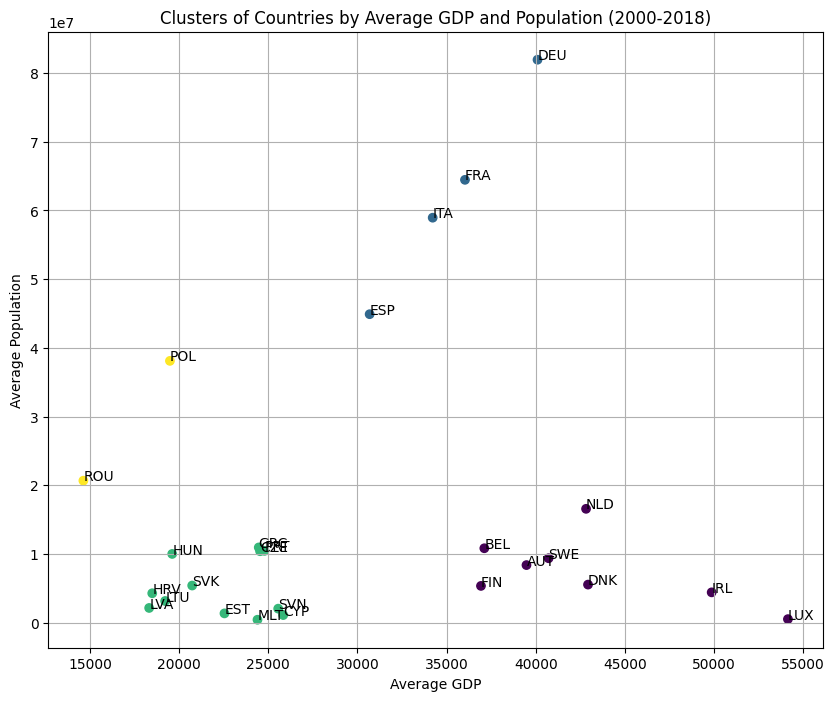

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

merged_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_combined_data.csv')


# Calculate average GDP and population for each country over the years 2000 to 2018
gdp_columns = [f'GDP_{year}' for year in range(2000, 2019)]
pop_columns = [f'Population_{year}' for year in range(2000, 2019)]

merged_data['Average_GDP'] = merged_data[gdp_columns].mean(axis=1)
merged_data['Average_Population'] = merged_data[pop_columns].mean(axis=1)

# Use averages for clustering
data_to_cluster = merged_data[['Average_GDP', 'Average_Population']]

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_to_cluster['Average_GDP'], data_to_cluster['Average_Population'], c=clusters, cmap='viridis')

# Annotate country codes
for i, txt in enumerate(merged_data['Country Code']):
    plt.annotate(txt, (data_to_cluster['Average_GDP'][i], data_to_cluster['Average_Population'][i]))

plt.title('Clusters of Countries by Average GDP and Population (2000-2018)')
plt.xlabel('Average GDP')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


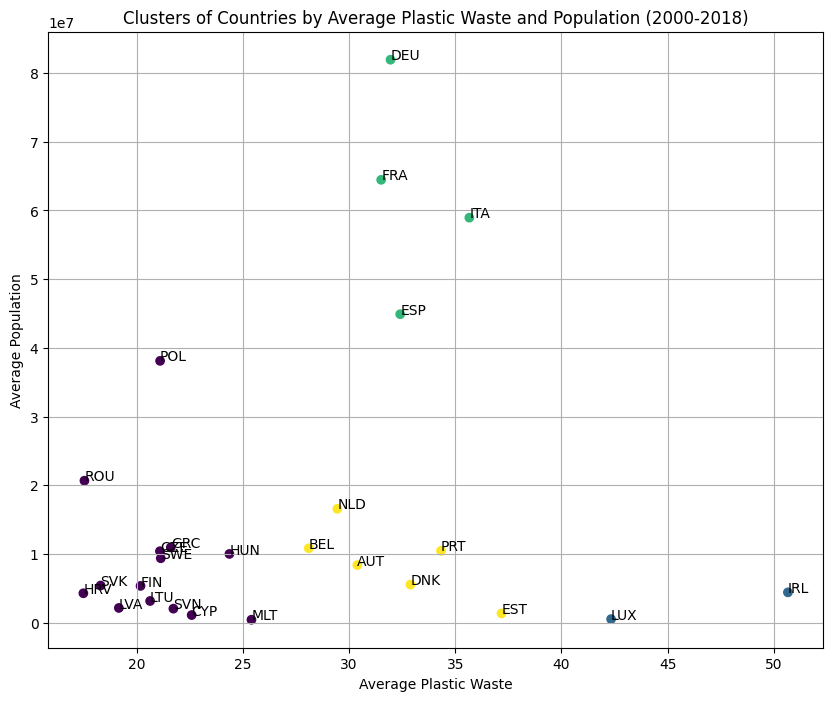

In [ ]:
plastic_waste_columns = [f'Plastic_Waste_{year}' for year in range(2000, 2019)]

# Check if all columns are present
if all(column in merged_data.columns for column in plastic_waste_columns):
    # Calculate the average plastic waste and population for each country over the years 2000 to 2018
    merged_data['Average_Plastic_Waste'] = merged_data[plastic_waste_columns].mean(axis=1)

    # Select average data for clustering
    data_to_cluster = merged_data[['Average_Plastic_Waste', 'Average_Population']].copy()

    # Standardize data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_to_cluster)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=0)
    clusters = kmeans.fit_predict(data_scaled)

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(data_to_cluster['Average_Plastic_Waste'], data_to_cluster['Average_Population'], c=clusters, cmap='viridis')

    # Annotate the country codes
    for i, txt in enumerate(merged_data['Country Code']):
        plt.annotate(txt, (data_to_cluster['Average_Plastic_Waste'][i], data_to_cluster['Average_Population'][i]))

    plt.title('Clusters of Countries by Average Plastic Waste and Population (2000-2018)')
    plt.xlabel('Average Plastic Waste')
    plt.ylabel('Average Population')
    plt.grid(True)
    plt.show()
else:
    print("One or more columns for plastic waste are missing from the DataFrame.")


In [ ]:
# Calculate average GDP, population, and plastic waste for each country
gdp_columns = [f'GDP_{year}' for year in range(2000, 2019)]
pop_columns = [f'Population_{year}' for year in range(2000, 2019)]
plastic_waste_columns = [f'Plastic_Waste_{year}' for year in range(2000, 2019)]

# Check if all columns are present
if all(column in merged_data.columns for column in gdp_columns + pop_columns + plastic_waste_columns):
    merged_data['Average_GDP'] = merged_data[gdp_columns].mean(axis=1)
    merged_data['Average_Population'] = merged_data[pop_columns].mean(axis=1)
    merged_data['Average_Plastic_Waste'] = merged_data[plastic_waste_columns].mean(axis=1)

    # Select average data for correlation
    data_for_correlation = merged_data[['Average_GDP', 'Average_Population', 'Average_Plastic_Waste']]

    # Calculate Pearson correlation matrix
    correlation_matrix = data_for_correlation.corr()
    print(correlation_matrix)

else:
    raise KeyError("One or more columns for GDP, population, or plastic waste are missing from the DataFrame.")


                       Average_GDP  Average_Population  Average_Plastic_Waste
Average_GDP               1.000000            0.145851               0.700062
Average_Population        0.145851            1.000000               0.183462
Average_Plastic_Waste     0.700062            0.183462               1.000000


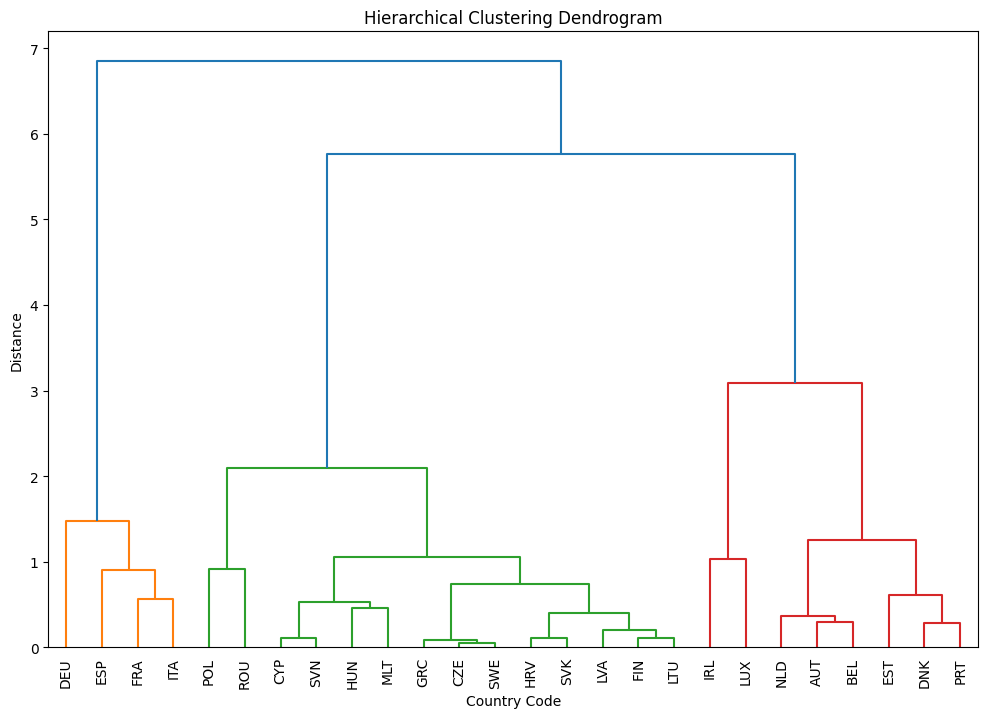

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# We already have scaled data in 'data_scaled' from previous standardization step.
# Generate linkage matrix for hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Set up matplotlib figure
plt.figure(figsize=(12, 8))

# Generate and plot dendrogram
dendrogram(Z, labels=merged_data['Country Code'].values, leaf_rotation=90, leaf_font_size=10)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country Code')
plt.ylabel('Distance')
plt.show()


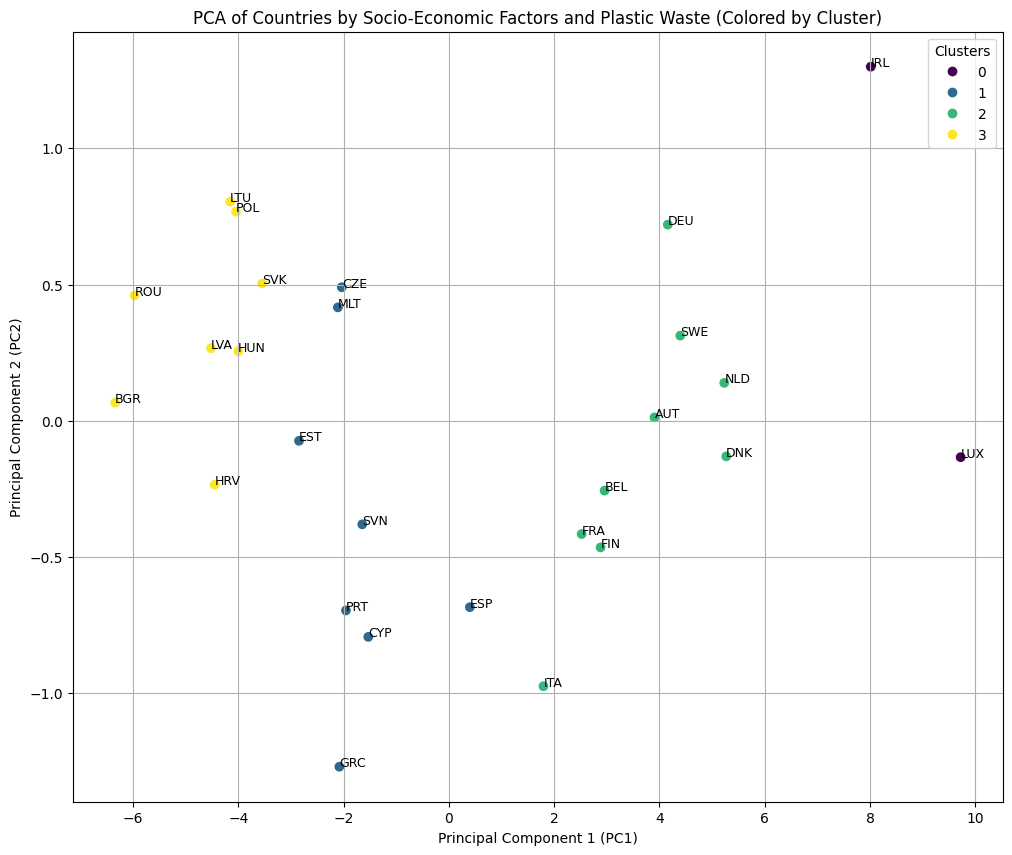

array([0.82893139, 0.09388619])

In [ ]:
from sklearn.decomposition import PCA

# Re-apply K-Means clustering to PCA results for color coding
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
pca_clusters = kmeans.fit_predict(principal_components)
pca_df['Cluster'] = pca_clusters  # Add cluster assignment to PCA results DataFrame

#plot PCA results with color coding by cluster
plt.figure(figsize=(12, 10))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')

# Add annotations for each point
for i, txt in enumerate(pca_df['Country']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=9)

# Add legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

# Set title and axis labels
plt.title('PCA of Countries by Socio-Economic Factors and Plastic Waste (Colored by Cluster)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)

plt.show()

# Print explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance